<a href="https://colab.research.google.com/github/Susreesha/ML/blob/main/TensorFlowIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf

a = tf.Variable(1)
b = tf.Variable(10)
c = a + b
print(c)
print(c.numpy())

tf.Tensor(11, shape=(), dtype=int32)
11


In [ ]:
@tf.function
def add(a,b):
  return a + b

def sub(a,b):
  return a - b

a = tf.Variable(5)
b = tf.Variable(6)
c = tf.Variable(1)

x = add(a,sub(b,c))
print(x.numpy())

10


In [ ]:
a=tf.Variable([[1,2], [3,4]], dtype=tf.float32)
b=tf.Variable([[7,8], [9,10]], dtype=tf.float32)
c=tf.Variable([[11,12], [13,14]], dtype=tf.float32)

y=(a*b) + c
print(y.numpy())

[[18. 28.]
 [40. 54.]]


In [ ]:
y+10

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[28., 38.],
       [50., 64.]], dtype=float32)>

In [ ]:
a.shape

TensorShape([2, 2])

In [ ]:
a = tf.Variable([[[1,2,3], [3,4,4], [5,6,8]],
               [[1,2,3], [3,10,4], [5,6,8]]], dtype=tf.float32)

a.shape

TensorShape([2, 3, 3])

In [ ]:
a[0][2][1:]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([6., 8.], dtype=float32)>

In [ ]:
A = tf.constant([[1,2], [3,4]]) # Shape (2,2)
B = tf.constant([[5,6], [7,8]]) # Shape (2,2)

C = tf.matmul(A,B)   # Matrix Multiplication

print(C.numpy())

[[19 22]
 [43 50]]


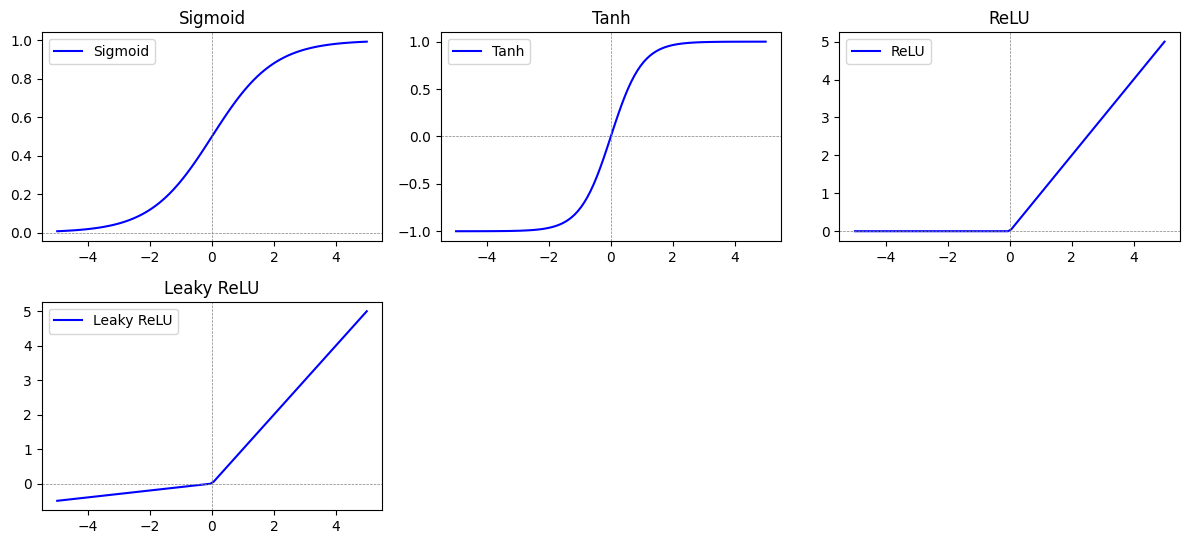

In [ ]:
import matplotlib.pyplot as plt

# Define input range
x = np.linspace(-5,5,100)

# Define activation functions
activations = {
    "Sigmoid": tf.nn.sigmoid(x),
    "Tanh": tf.nn.tanh(x),
    "ReLU": tf.nn.relu(x),
    "Leaky ReLU": tf.nn.leaky_relu(x, alpha=0.1)
}

# Plot activation functions
plt.figure(figsize=(12,8))
for i, (name,y) in enumerate(activations.items()):
  plt.subplot(3,3,i+1)
  plt.plot(x,y, label=name, color='b')
  plt.title(name)
  plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
  plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
  plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
tf.nn.sigmoid(x)

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([0.00669285, 0.00739896, 0.00817894, 0.00904041, 0.00999169,
       0.01104196, 0.01220126, 0.01348063, 0.01489212, 0.01644893,
       0.01816549, 0.02005754, 0.0221422 , 0.02443814, 0.02696557,
       0.02974643, 0.03280439, 0.036165  , 0.0398557 , 0.04390588,
       0.04834692, 0.05321217, 0.0585369 , 0.06435824, 0.07071501,
       0.07764755, 0.0851974 , 0.093407  , 0.1023192 , 0.11197671,
       0.12242144, 0.13369374, 0.14583148, 0.1588691 , 0.17283646,
       0.18775769, 0.20364993, 0.22052213, 0.23837374, 0.25719365,
       0.2769591 , 0.29763488, 0.31917283, 0.34151151, 0.36457644,
       0.38828059, 0.41252537, 0.43720205, 0.46219351, 0.48737642,
       0.51262358, 0.53780649, 0.56279795, 0.58747463, 0.61171941,
       0.63542356, 0.65848849, 0.68082717, 0.70236512, 0.7230409 ,
       0.74280635, 0.76162626, 0.77947787, 0.79635007, 0.81224231,
       0.82716354, 0.8411309 , 0.85416852, 0.86630626, 0.87757856,
       0.88802

In [ ]:
#define input range (a set of 3 sample inputs)

x=np.linspace(-3,3,100)
inputs= np.vstack([x,x-1,x+1])  # creating three different input series
#apply softmax to each column
softmax_outputs= tf.nn.softmax(inputs,axis=0).numpy()

import pandas as pd
df1=pd.DataFrame(inputs.T)
df2=pd.DataFrame(softmax_outputs.T)

In [ ]:
df1.head(3)

,0,1,2
0,-3.000000,-4.000000,-2.000000
1,-2.939394,-3.939394,-1.939394
2,-2.878788,-3.878788,-1.878788


In [ ]:
df2.head(3)

,0,1,2
0,0.244728,0.090031,0.665241
1,0.244728,0.090031,0.665241
2,0.244728,0.090031,0.665241


f(x): [9. 4. 1. 0. 1. 4. 9.]
df/dx: [-6. -4. -2.  0.  2.  4.  6.]


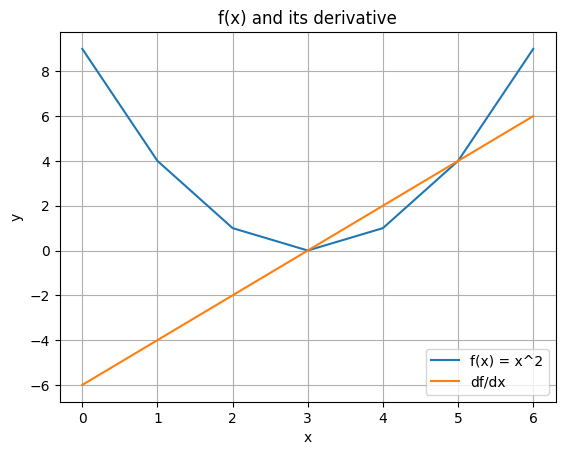

In [ ]:
# Define variable x
x = tf.Variable([-3.0, -2., -1., 0., 1., 2., 3. ])

# Define function f(x) = x^2
def f(x):
  return x**2

# Compute gradients using GradientTape
with tf.GradientTape() as tape:
  y = f(x)

dfdx = tape.gradient(y,x)

# Print function values and gradients
print("f(x):", y.numpy())
print("df/dx:", dfdx.numpy())

# Plot function and its derivative
plt.plot(f(x), label="f(x) = x^2")
plt.plot(dfdx, label="df/dx")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("f(x) and its derivative")
plt.grid(True)
plt.show()

f(x): [-64. -30. -12.  -4.   0.   6.  20.]
df/dx: [44. 25. 12.  5.  4.  9. 20.]


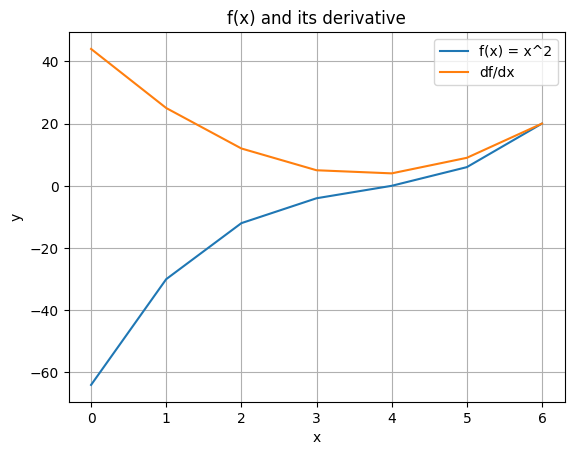

In [ ]:
# Define variable x
x = tf.Variable([-3.0, -2., -1., 0., 1., 2., 3. ])

# Define function f(x) = (x^3)-2(x^2)+(5*x)-4
def f(x):
  return ((x**3) - 2*(x**2) + (5*x) - 4)

# Compute gradients using GradientTape
with tf.GradientTape() as tape:
  y = f(x)

dfdx = tape.gradient(y,x)

# Print function values and gradients
print("f(x):", y.numpy())
print("df/dx:", dfdx.numpy())

# Plot function and its derivative
plt.plot(f(x), label="f(x) = x^2") # You might want to change the label to reflect the actual function
plt.plot(dfdx, label="df/dx")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("f(x) and its derivative")
plt.grid(True)
plt.show()

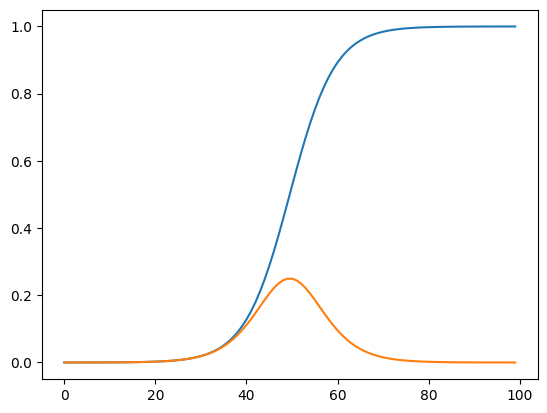

In [ ]:
x = tf.Variable(np.linspace(-10, 10, 100))

def sig(x):
  return 1/(1+tf.exp(-x))

with tf.GradientTape(persistent=True) as t:
  y = sig(x)

z = t.gradient(y,x)

plt.plot(sig(x))
plt.plot(z)

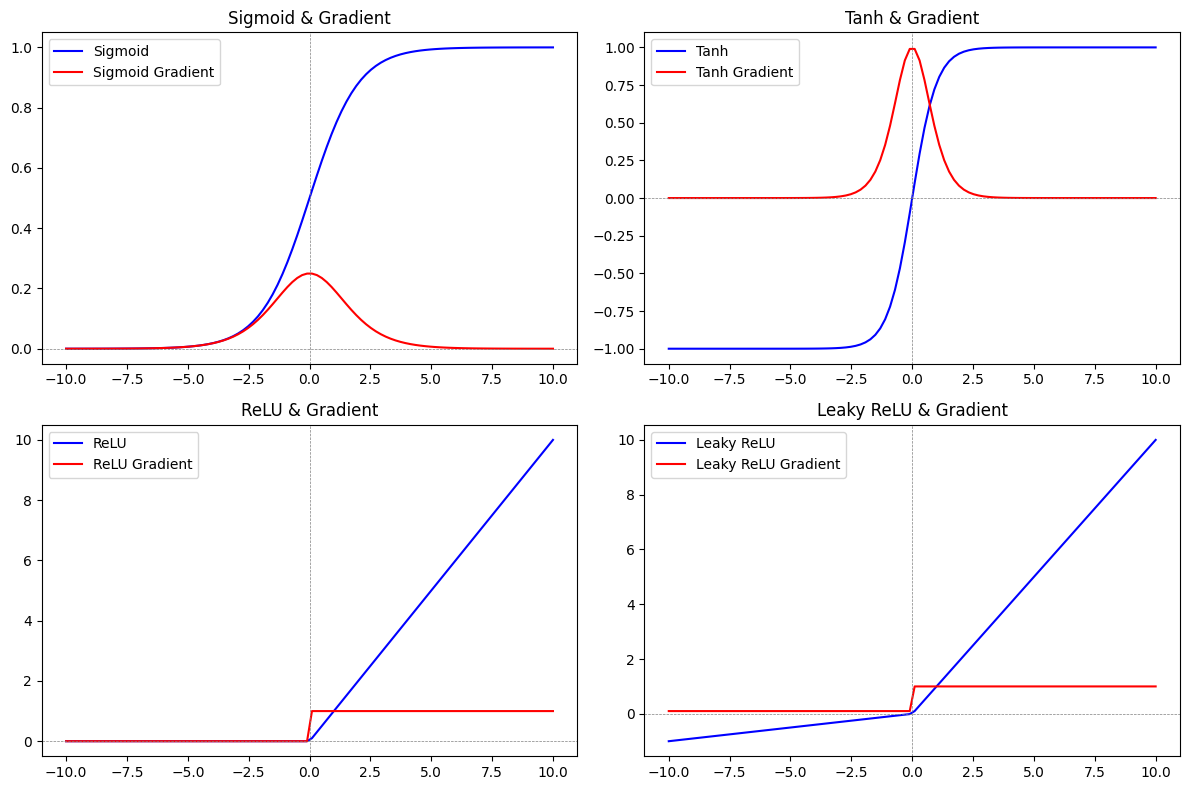

In [ ]:
# Define the input range as Tensor
x = tf.Variable(np.linspace(-10, 10, 100), dtype=tf.float32)

# Define activation functions
@tf.function
def sigmoid(x):
  return tf.nn.sigmoid(x)

@tf.function
def tanh(x):
  return tf.nn.tanh(x)

@tf.function
def relu(x):
  return tf.nn.relu(x)

@tf.function
def leaky_relu(x, alpha=0.1):
  return tf.nn.leaky_relu(x, alpha=alpha)

#Compute gradients using tf.GradientTape()
@tf.function
def compute_gradients(func, x):
  with tf.GradientTape() as tape:
    y = func(x)
  return tape.gradient(y, x)

# Plot activation functions
activations={
    "Sigmoid": tf.nn.sigmoid(x),
    "Tanh": tf.nn.tanh(x),
    "ReLU": tf.nn.relu(x),
    "Leaky ReLU": tf.nn.leaky_relu(x, alpha=0.1)
}

# Compute gradients
gradients = {
    "Sigmoid": compute_gradients(sigmoid, x),
    "Tanh": compute_gradients(tanh, x),
    "ReLU": compute_gradients(relu, x),
    "Leaky ReLU": compute_gradients(leaky_relu, x)
}

# Convert TensorFlow tensors to NumPy arrays for plotting
x_vals = x.numpy()
activations = {k: v.numpy() for k, v in activations.items()}
gradients = {k: v.numpy() for k, v in gradients.items()}

# Plot both activation functions and their  gradients on the same graph
plt.figure(figsize=(12,8))
for i, (name,y) in enumerate(activations.items()):
  plt.subplot(2,2,i+1)      # 2*2 grid layout
  plt.plot(x_vals,y, label=f'{name}', color='b')     # Blue for activation function
  plt.plot(x_vals, gradients[list(gradients.keys())[i]], label=f'{name} Gradient', color = 'r')     # Red for Gradient
  plt.title(f'{name} & Gradient')
  plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
  plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
  plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Input Value
x = tf.Variable(2.0)

# Define function y = x^2 and z = sin(y)
@tf.function
def chain_rule_example(x):
   with tf.GradientTape(persistent=True) as tape: # Set persistent=True to allow multiple gradient calculations
      y = x ** 2  # First Function y = x^2
      z = tf.sin(y)  #Second Function z = sin(y)

   # Compute gradients using the chain rule
   dz_dy = tape.gradient(z,y)  # dz/dy = cos(y)
   dy_dx = tape.gradient(y,x)  # dy/dx = 2x
   dz_dx = tape.gradient(z,x)  # Chain rule dz/dx = dz/dy * dy/dx

   return z, dz_dx

# Compute Output and Gradient
z_value, dz_dx_value = chain_rule_example(x)

# Print results
print("Output z at x=2:", z_value.numpy())
print("Gradient dz/dx at x=2:", dz_dx_value.numpy())

Output z at x=2: -0.7568025
Gradient dz/dx at x=2: -2.6145744
